In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.agents import DiscreteActorCritic
from src.networks import DiscreteActorCriticNetwork

GAMMA = 0.99
LEARNING_RATE = 0.01
ENTROPY_BETA = 0.001
N_STEPS = 4
BATCH_SIZE = 16

CHECKPOINT_PATH = os.path.join("models", "01_cartpole_ac.tar")



env = gym.make("CartPole-v0")
test_env = gym.make("CartPole-v0")
device = torch.device("cpu")
net = DiscreteActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.n
).to(device)

agent = DiscreteActorCritic(
    env=env,
    test_env=test_env,
    net=net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
)

In [2]:
agent.learn(1000, verbose_every=0)
# agent.plot_performance()

100%|██████████| 1000/1000 [00:16<00:00, 60.62it/s]


In [3]:
agent.test(num_episodes=100)

200.0

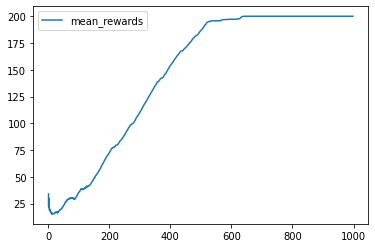

In [4]:
agent.plot_performance(['mean_rewards'])